## Inputs That are required

n => No of Sample Size (if N <= 30 then T test else Z or T test)<br> 
Std => Statdard Deviation <br>
xbar => Mean<br>
mu => <br>
Alpha => default value take it as  0.05 <br>
type of tale => 1 Rtight Tale, -1 Left Tale, 0 two tale <br>

formula for the Hypothesis testing<br>

z = (xbar-mu)/(std/sqrt(n))

formula for the Population Propotion <br>
z = (pbar - pNot)/(sqrt((pnot(1-pnot))/n)

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats, optimize, interpolate

----------------------------------Step 1 ----------------------------------------------------
Ho => mu <= 12
Ha => mu > 12
----------------------------------Step 2------------------------------------------------------
level of significance. Alpha = 0.05
----------------------------------Step 3 ------------------------------------------------------
Test statistic. Value is z-score = 2.47
Value Z(0.95) of = 1.64
As we see Ho Hypothesys is Rejected 1.64 < 2.47 


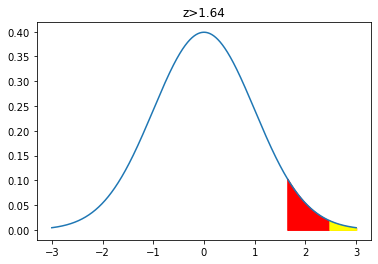

----------------------------------Step 4 ------------------------------------------------------
Cumulative probability of the Score = 0.9933
P value = 0.0067
As Reject 0.0067 < 0.5 the H0 Hypothesys


In [21]:
# n     = float(input("Enter the No of the Size of the Sample:"))
# Std   = float(input("Enter the Standard Deviation of the Sapmle:"))
# xbar  = float(input("Enter the Mean of the Sample:"))
# mu    = float(input("Enter the Expected Mean Mu :"))
# Alpha = float(input("Enter the Value of Alpha:"))
# tale  = float(input("Enter the Type of tale => 1=Rtight Tale, -1=Left Tale, 0=two tale:"))

    

#  + single tail test
# n      = 40
# Std    = 3.2
# xbar   = 13.25
# mu     = 12
# Alpha  = .05
# tale   = 1   
# t_test = False   # True n <= 30 else False 

# two tail test
# n      = 30
# Std    = 0.2
# xbar   = 6.1
# mu     = 6
# Alpha  = .03
# tale   = 0   
# t_test = False   # True n <= 30 else False

'''
    for the tale value
    if (mu <= value then 1) 
    if (mu >= value then -1) 
    if (mu != value then 0)
'''
def draw_z_score(x, cond, mu, sigma, title, cond2):
    y = scipy.stats.norm.pdf(x, mu, sigma)
    z = x[cond]
    z1 = x[cond2]
    plt.plot(x, y)
    plt.fill_between(z, 0, scipy.stats.norm.pdf(z, mu, sigma),color="red")
    plt.fill_between(z1, 0, scipy.stats.norm.pdf(z1, mu, sigma),color="yellow")
    plt.title(title)
    plt.show()
  
zscore = (xbar-mu)/(Std/math.sqrt(n))     

print("----------------------------------Step 1 ----------------------------------------------------")
print(f'Ho => {("mu = "+str(mu)) if tale == 0 else ( ("mu <= "+str(mu)) if tale == 1 else ("mu >= "+str(mu))) }')
print(f'Ha => {("mu != "+str(mu)) if tale == 0 else ( ("mu > "+str(mu)) if tale == 1 else ("mu < "+str(mu))) }')

print("----------------------------------Step 2------------------------------------------------------")
print(f'level of significance. Alpha = {Alpha}')

print("----------------------------------Step 3 ------------------------------------------------------")

print(f'Test statistic. Value is {"t-score" if t_test else "z-score"} = {round(zscore,2)}') 
x = np.arange(-3,3,0.001)
z_alpha = scipy.stats.norm.ppf(1 - Alpha/2)  if tale == 0 else scipy.stats.norm.ppf(1 - Alpha)
z0 = round(z_alpha,2)

print(f'Value {("N="+str(n)+" "+"T") if t_test else "Z"}({ 1 - Alpha/2 if tale == 0 else 1 - Alpha  }) of = {round(z_alpha,2)}')
Cum_probability = scipy.special.ndtr(zscore)
if tale == 1: # right Tail
    print(f'As we see Ho Hypothesys is {("Accepted "+str(round(z_alpha,2)) +" > " + str(round(zscore,2))) if z_alpha > zscore else ("Rejected "+str(round(z_alpha,2)) +" < " + str(round(zscore,2))) } ')
    p_value = (1 - Cum_probability)
    draw_z_score(x, x>z0, 0, 1, 'z>'+str(z0), x>zscore)
elif tale == -1: # left Tail
    print(f'As we see Ho Hypothesys is {("Accepted "+str(round(z_alpha,2)) +" < " + str(round(zscore,2))) if abs(z_alpha) > abs(zscore) else ("Rejected "+str(round(z_alpha,2)) +" > " + str(round(zscore,2))) } ')
    p_value = (1 - Cum_probability)
#     draw_z_score(x, x<z0, 0, 1, 'z<'+str(z0))
    draw_z_score(x, x<z0, 0, 1, 'z<'+str(z0), x<zscore)
else: # two Tail
    print(f'As we see Ho Hypothesys is {("Accepted ") if abs(z_alpha) > abs(zscore) else ("Rejected")}')
    p_value = 2*(1 - Cum_probability) # as its a two tale test we need to multiply the value by 2
    if not(abs(z_alpha) > abs(zscore)):
        draw_z_score(x, (-z0 < x) & (x < z0), 0, 1, str(-z0)+'<z<'+str(z0),((x < zscore) if abs(z_alpha) >= zscore else (x > zscore)) )
    
print("----------------------------------Step 4 ------------------------------------------------------")   
if t_test: # T -Statstics
    z_alpha = scipy.stats.t.ppf(1 - Alpha/2,n-1)  if tale == 0 else scipy.stats.t.ppf(1 - Alpha,n-1)
else:  # Z -Statics 
    z_alpha = scipy.stats.norm.ppf(1 - Alpha/2)  if tale == 0 else scipy.stats.norm.ppf(1 - Alpha) 

print(f'Cumulative probability of the Score = {round(Cum_probability,4)}')
print(f'P value = {round(p_value,4)}')
print(f'As {("Accept "+str(round(p_value,4))+" > "+str(Alpha) ) if p_value > 0.5 else ("Reject "+str(round(p_value,4))+" < 0.5" ) } the H0 Hypothesys')


In [13]:
scipy.stats.norm.sf(abs(Hypothesystesting(n,Std,xbar,mu,Alpha)))

0.0030849496602721716

In [14]:
scipy.stats.norm.ppf(.95)

1.6448536269514722

In [15]:
scipy.stats.norm.ppf(.975)

1.959963984540054

In [16]:
p_values = 1 - scipy.special.ndtr(Hypothesystesting(n,Std,xbar,mu,Alpha))
p_values

0.0030849496602721738

In [17]:
scipy.special.ndtr(.95)

0.8289438736915182

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

In [36]:
stats.t.ppf(1-0.025, n-1)

2.045229642132703

In [ ]:
#Studnt, n=999, p<0.05, 2-tail
#equivalent to Excel TINV(0.05,999)
print stats.t.ppf(1-0.025, 999)

#Studnt, n=999, p<0.05%, Single tail
#equivalent to Excel TINV(2*0.05,999)
print stats.t.ppf(1-0.05, 999)

In [51]:
scipy.stats.norm.ppf(1 - Alpha/2)  if tale == 0 else scipy.stats.norm.ppf(1 - Alpha) 

2.17009037758456